In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("data\dataset3.csv")

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
# Load data
X = df[["ratio_to_median_purchase_price"]]

# Extracting Target / Class Labels
y = df['fraud']

In [5]:
from sklearn.model_selection import train_test_split
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42) 

In [6]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

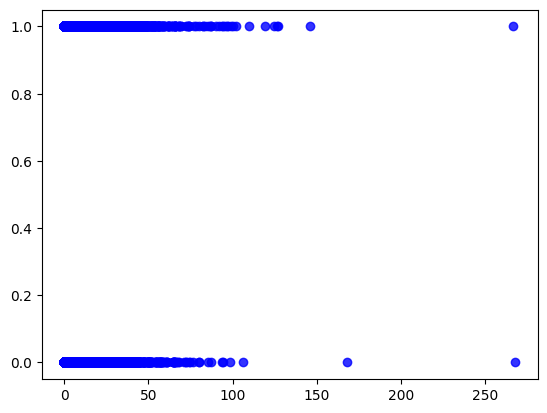

In [8]:
x = df[["ratio_to_median_purchase_price"]]
y = df["fraud"]

x=x.to_numpy().reshape(-1,1)
y=y.to_numpy()

θ_o=clf.intercept_
θ_1=clf.coef_

#draw logisitc curve using seaborn library
ax=sns.regplot(x="ratio_to_median_purchase_price", y="fraud",  data=df, logistic=True, ci=None, 
            scatter_kws={'color': 'blue'}, line_kws={'color': '#df355a'})

plt.xlabel("ratio_to_median_purchase_price", fontsize=12)
plt.ylabel("fraud", fontsize=12)

print(θ_o)
print(θ_1)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[630449   8277]
 [ 47132  14142]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    638726
         1.0       0.63      0.23      0.34     61274

    accuracy                           0.92    700000
   macro avg       0.78      0.61      0.65    700000
weighted avg       0.90      0.92      0.90    700000

0.9208442857142857


In [10]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[270323   3548]
 [ 20122   6007]]
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96    273871
         1.0       0.63      0.23      0.34     26129

    accuracy                           0.92    300000
   macro avg       0.78      0.61      0.65    300000
weighted avg       0.90      0.92      0.90    300000

0.9211
